### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import preprocessing
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [91]:
df = pd.read_csv('IMDB Dataset.csv')

In [92]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [93]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### View descriptive stats

In [95]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [96]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Check for imbalanced data

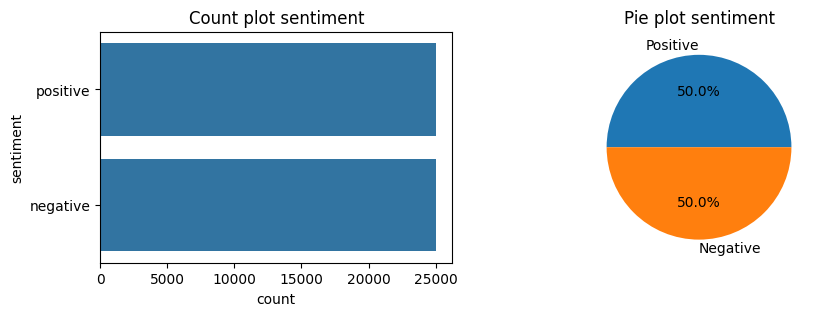

In [97]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(y='sentiment',data=df)
plt.title('Count plot sentiment')
plt.subplot(1,2,2)
plt.pie(df['sentiment'].value_counts(),labels=['Positive','Negative'], autopct='%1.1f%%', startangle=0)
plt.title('Pie plot sentiment')
plt.show()

### Create a function to Preprocess the review column

In [98]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [99]:
def preprocess(sentence):
    text = re.sub(r'[^A-Za-z0-9]',' ',sentence).split()
    words = [x.lower()for  x in text if x not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    word = [lemmatizer.lemmatize(word, 'v') for word in words]
    # Join the tokens back into a sentence
    word = " ".join(word)
    return word

df['review'] = df['review'].apply(preprocess)

KeyboardInterrupt: 

### Print some text after applying the function

In [100]:
df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

### Split the dataset into Input (X) & Target (y) variable

In [101]:
X = df['review']
y = df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [102]:
y=y.map({'positive':1 , 'negative':0})

In [103]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [105]:
tokenizer = Tokenizer(num_words=5000)

### Split the dataset into Training & Testing set

In [106]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20)

In [107]:
tokenizer.fit_on_texts(xtrain)

In [108]:
vocal_size =len(tokenizer.word_index)+1


In [109]:
tokenizer

In [110]:
def text_encoding(txt):
    encoded = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(encoded, maxlen = 128)
    return padded

In [111]:
xtrain = text_encoding(xtrain)
xtest = text_encoding(xtest)

### Create keras Sequential Model with LSTM Layers

In [125]:
from keras import layers
from keras import Sequential

In [126]:
model = Sequential()
model.add(layers.Embedding(vocal_size, 128,input_length = 128))
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

### Compile the model

In [127]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 128, 128)       │    14,379,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 128, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,951,493 (167.66 MB)

 Trainable params: 14,650,497 (55.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,300,996 (111.77 MB)

### Train the model with our training set

In [129]:
model.fit(xtrain,ytrain,epochs=15,validation_split=0.01)

Epoch 1/15
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 284s 223ms/step - accuracy: 0.7761 - loss: 0.4622 - val_accuracy: 0.8825 - val_loss: 0.2990
Epoch 2/15
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 285s 230ms/step - accuracy: 0.8916 - loss: 0.2710 - val_accuracy: 0.8975 - val_loss: 0.2938
Epoch 3/15
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 281s 227ms/step - accuracy: 0.9168 - loss: 0.2156 - val_accuracy: 0.8850 - val_loss: 0.2833
Epoch 4/15
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 273s 220ms/step - accuracy: 0.9321 - loss: 0.1753 - val_accuracy: 0.8900 - val_loss: 0.2945
Epoch 5/15
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 316s 256ms/step - accuracy: 0.9506 - loss: 0.1362 - val_accuracy: 0.8875 - val_loss: 0.3354
Epoch 6/15
 527/1238 ━━━━━━━━━━━━━━━━━━━━ 2:44 231ms/step - accuracy: 0.9645 - loss: 0.1027

KeyboardInterrupt: 

### Make prediction with X_test

In [130]:
pred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [137]:
predict = pred.argmax(axis=1)

In [138]:
len(predict)

10000

In [146]:
ytest

11816    1
7101     1
29106    1
49111    1
16616    1
        ..
25711    0
33120    0
32670    1
33585    1
45520    0
Name: sentiment, Length: 10000, dtype: int64

In [139]:
len(ytest)

10000

### Convert to 0 and 1 with higher probability towards 1

### Evaluate the model

In [131]:
model.evaluate(xtrain,ytrain)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.9736 - loss: 0.0815


[0.08420003205537796, 0.9727500081062317]

### Check accuracy score

In [140]:
from sklearn.metrics import confusion_matrix,classification_report

### Check confusion matrix

<Axes: >

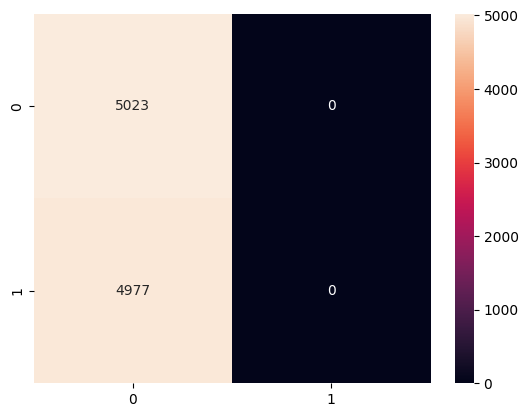

In [141]:
sns.heatmap(confusion_matrix(ytest, predict),annot=True,fmt='d')

### Print Classification report

***

In [142]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5023
           1       0.00      0.00      0.00      4977

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.34     10000



c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo